# nqueen problem using Ant Colony algorithm

# الگوریتم کلی:
### 1- مقدار دهی اولیه
ابتدا مختصات شهر ها را از کاربر ورودی گرفته، و سپس فواصل شهر ها را در یک ماتریس ذخیره میکنیم که هر خانه ماتریس، به طور مثال  distanc_matrix[i][j] نشان دهنده فاصله بین دو شهر i و j می باشد.
در ابتدای الگوریتم، نیاز به تعریف یک جمعیت اولیه از مورچگان داریم. پس ابتدا به یک تعداد مشخص، آرایه تولید میکنیم که هر آرایه درواقع نماینده یک مسیر طی شده توسط یک مورچه و به عبارتی دیگر یک جواب است. 
سپس در فواصل بین شهر ها، یک مقدار ثابت اولیه، فورمون باقی میگذاریم.
همچنین در این مرحله میتوانیم مقادیر اولیه پارامتر هایمان مانند الفا، بتا، ضریب تبخیر و.. را مقدار دهی کنیم.

### ۲- پیمایش مسیر توسط مورچگان
حال هر مورچه باید از یک شهر رندوم شروع کرده و شهر بعدی را براساس یک احتمال انتخاب کرده و در نهایت یک دور کامل بزند. ابتدا بدون کم شدن از کلیت مسئله فرض میکنیم مورچه ما از شهر صفر شروع به حرکت میکند.  سپس مورچه باید شهر بعدی را براساس یک تابع احتمال برحسب فاصله آن شهر و فورمون موجود در آن مسیر انتخاب کند. در این الگوریتم، ابتدا مورچه تمام انتخاب های ممکن خود را نگاه میکند، سپس بررسی میکند که هر شهر چه میزان فاصله و چه مقدار فورمون دارد و مقدار ۱ بر روی فاصله را به توان بتا و مقدار فورومون را به توان آلفا میرساند. حالا مورچه باهوش ما، براساس این اعداد، یک شهر را انتخاب میکند. شهری که عدد بیشتری داشته باشد، احتمال بیشتری برای انتخاب نیز دارد.

### ۳- فورمون گذاری مورچه
حال نوبت به فورمون گذاری مورچه در دوری که پیموده است میرسد.  فورومون های موجود در مسیر بین هر دو شهر، براساس تابعی از برازش مسیر پیموده شده توسط مورچه جایگذاری میشود. که این مقدار از فرمولی محاسبه میشود که بدین صورت است: فورمون قبلی و برازش دور پیموده شده. در واقع اگر مسیری کوتاه باشد، برازش بیشتری دارد و درنتیجه فورمون  بیشتری دریافت میکند.

### ۴- تبخیر فورمون
پس از آنکه همه مورچه های ما دور خود را زدند و به خانه بازگشتند، نوبت به تبخیر فورمون میرسد. در واقع در این مرحله با استفاده از ضریب تبخیر ( که من ۰.۱۵ درنظر گرفته ام) مقداری از فورمون های موجود بر روی هر مسیر، براساس مقدار رندوم که بین ۰.۱۵ و ۰.۲ است، تبخیر میشود.

### ۵-تکرار الگوریتم
حال باید الگوریتم و مراحل ۱تا۴ را آنقدر تکرار کرد تا مسیر بهینه پیدا شود. در واقع مورچه های بدبخت ما انقدر باید این مسیر را طی کنند تا براساس فورمون های بجا گذاشته خود در مسیر، بتوانند کوتاه ترین مسیر را پیدا کنند. اینکار با تابع next_iteration انجام میشود.

# پیاده سازی:


### ابتدا کتابخانه هایی که نیاز داریم را ایمپورت میکنیم و ورودی را از کاربر میگیریم


In [7]:
import random
import numpy as np
import time
from math import sqrt,ceil


# حال توابع کلاس های مورد نظر را تعریف میکنیم
### def __init__
حال میخواهیم الگوریتم گفته شده را توسط توابع پایتون پیاده سازی کنیم.
یک کلاس AntColony تعریف میکنم.
مقادیر عددی مانند تعداد مورچه ها، تعداد شهر ها، آلفا و بتا و آرایه ها و ماتریس هایمان که ثابت هستند یا حتی مانند جمعیت و ماتریس فورمون و آرایه فیتنس تغییر میکنند را نیز در اینجا مقدار دهی اولیه میکنیم.
### def initial
حال باید جمعیت اولیه را تولید کنیم و ارایه فیتنس متناظر آن ها را نیز حساب کنیم. دلیل تعریف تابع initial جدا این است که بتوان تاثیر مقادیر اولیه در الگوریتم را ملاحظه کرد. هرچند در این الگوریتم این موضوع تاثیر چندانی ندارد. ولی طبق عادت و تمیز نویسی کد ان را اضافه کردم.

### calc_fitness_function 
در اینجا تابع فیتنس را تعریف کرده ام که ۱ بر روی مجموع مسیر طی شده توسط یک مورچه است. این تابع یک ارایه که دور پیموده شده توسط مورچه است را ورودی گرفته، بعداد کانفلیکت ها را براساس توابع calc_distance حساب کرده و برمیگرداند.

### evaporation_pheromone_matrix & evaporation_pheromone
در این دوتابع نحوه تبخیر فورمون ها معین میشود. تابع تبخیر فورمون،مقدار یک فورمون و یک عدد را که بین صفر و یک است را گرفته، و فورمون تبخیر شده را برمیگرداند. تابع تبخیر ماتریکس نیز فواصل بین هر دو شهر را براساس یک عدد رندوم و فراخوانی تابع تبخیر فورومن تبخیر میکند.هر چه این تبخیر بیشتر شود، میزان پویش نیز بیشتر میشود.
### calc_pheromone_matrix
در این تابع فورومون های موجود در مسیر بین هر دو شهر، براساس تابعی از برازش مسیر پیموده شده توسط مورچه جایگذاری میشود. که این مقدار از فرمولی محاسبه میشود که بدین صورت است که فورمون قبلی و برازش دور پیموده شده. در واقع اگر مسیری کوتاه باشد، برازش بیشتری دارد و درنتیجه فورمون  بیشتری دریافت میکند. همچنین تابع گفته شده را میتوان به عنوان پارامتر این تابع ورودی داد تا نحوه تاثیر برازش مسیر متفاوت شود. هر چه این تاثیر بیشتر شود، میزان انتفاع نیز بیشتر میشود.
### select_node_probability
این تابع در واقع هسته الگوریتم ما میباشد. در این تابع نحوه انتخاب شهر بعدی براساس فاصله و فورمون موجود روی فاصله مشخص میشود. این فورومون دقیقا براساس فرمول موجود در اسلاید ها که الفا و بتا را نیز تاثیر میدهد پیاده سازی شده است.
این تابع یک شهر که در آن هستیم و همسایه های ان را میگیرد و شهر بعدی که باید برویم را خروجی میدهد.
### ant_tour
در این تابع صرفا در یک آرایه مسیری که مورچه باید بپیماید و شهر ها را براساس تابع قبل انتخاب کند نگهداری میشود و آن را برمیگرداند.
### next_iteration 
در این تابع نیز در واقع اینطور تصور میشود که ما در ابتدای اجرای هر بار فور، در خانه هستیم و میخواهیم مسیر جدیدی را طی کنیم که اینکار با فراخوانی تابع ant_tour به تعداد مورچه ها انجام میشود.
همچنین بعد از پیمایش هر مورچه، ماتریس فومرون ها اپدیت شده، و پس از رفت و امد کل مورچه ها، تبخیر نیز اعمال میشود.


In [8]:
class AntColony:
    def __init__(self,pop_size:int,nqueen:int,alpha=0.01,beta=50,evap_val=0.15):
        # First we set our constants:
        self.pop_size = pop_size
        self.nqueen = nqueen   # ex: 4 cities
        self.alpha = alpha
        self.evap_val = evap_val
        # Then we set our constant Arrays:
        # Then we set our variable Arrays:
        self.population = None
        self.best_ans = nqueen**2
        self.best_ans_array =[]
        self.pheromone_matrix = [ [2 for i in range(self.nqueen)] for j in range(self.nqueen) ]
        self.fitness_arr = [-1 for i in range(self.pop_size)]


    def initial(self):
        #Calculate distances
        #Set the inital population
        self.population = [list(random.sample(range(self.nqueen), self.nqueen)) for i in range(self.pop_size)]
        #Calculate first iteration fitnesses and pheromones
        for ant_idx in range(self.pop_size):
            curr_ant = self.population[ant_idx]
            self.fitness_arr[ant_idx] = self.fitness_function( curr_ant)
        self.calc_pheromone_matrix(self.population[ant_idx])    #Can be comment
        print ("-- : ",self.pop_size,self.nqueen ,self.pheromone_matrix , self.fitness_arr )

    def fitness_function(self, ant):
        tempFitness = 0
        for i in range (self.nqueen):
            for j in range (i+1 , self.nqueen):
                if (abs(ant[i] - ant[j]) == abs(i - j)):
                    tempFitness +=1
                if (abs(ant[i] == ant[j])):
                    tempFitness +=1
        if (tempFitness < self.best_ans ):
             self.best_ans = tempFitness 
             self.best_ans_array = ant.copy()
        return tempFitness

    def evaporation_pheromone(self,pheromone,p):#p should be less than 1
        return (1-p)*pheromone

    def evaporation_pheromone_matrix(self):
        for i in range (self.nqueen -1):
            for j in range (i + 1,self.nqueen):
                random_p = random.random() * 0.2 + self.evap_val
                curr_pheromone = self.evaporation_pheromone( self.pheromone_matrix[i][j], random_p )
                self.pheromone_matrix[i][j] = curr_pheromone
                self.pheromone_matrix[j][i] = curr_pheromone

    def calc_pheromone_matrix(self,ant,func=lambda a:a):
        delta_fitness = func(self.fitness_function(ant))
        for i in range(0,self.nqueen - 1):
            self.pheromone_matrix[ant[i]][ant[i+1]] += delta_fitness/(self.nqueen**2)
            self.pheromone_matrix[ant[i+1]][ant[i]] += delta_fitness/(self.nqueen**2)
        #Distance between Last node and First node:
        self.pheromone_matrix[ant[self.nqueen - 1]][ant[0]] += delta_fitness/(self.nqueen**2)
        self.pheromone_matrix[ant[0]][ant[self.nqueen - 1]] += delta_fitness/(self.nqueen**2)


    def select_node_probability(self,current_node,neighbors):
        indexes = []
        weights = []
        for node_idx in range(self.nqueen):
            if neighbors[node_idx][1] == False and node_idx != current_node:
                indexes.append(neighbors[node_idx][0])
                weights.append((self.pheromone_matrix[current_node][node_idx] ** self.alpha))
        # print(weights)
        next_node = random.choices(indexes, weights=weights)[0]
        return next_node

    def ant_tour(self):
        visited = [ [i,False] for i in range(self.nqueen)]
        tour = [0]
        visited[0][1] = True
        for i in range(self.nqueen-1):
            next_node = self.select_node_probability(tour[i],visited)
            visited[next_node][1] = True
            tour.append(next_node)
        # print(tour)
        
        return tour
    
    def next_iteration(self):
        for ant_idx in range(self.pop_size):
            curr_ant = self.ant_tour()
            self.population[ant_idx] = curr_ant
            self.fitness_arr[ant_idx] = self.fitness_function( curr_ant)
            self.calc_pheromone_matrix(curr_ant)
        self.evaporation_pheromone_matrix()





## تابع کلی الگوریتم
برای راحتی کار و قابل استفاده بودن الگوریتم، یک تابع مینویسیم که یک شی از کلاس الگوریتم ما ساخته، یک بریک پوینت و یک نسل حدی میگیرد، که الگوریتم را برای ما تا برقراری آن شرایط اجرا میکند.
همچنین نسل ها را در یک ارایه ذخیره کرده و بهترین فاصله در آن نسل را در یک ارایه میریزیم تا در صورت خواستن کشیدن نمودار، بتوانیم از آن ها استفاده کنیم. به علاوه، بهترین جواب تا نسلی که در ان هستیم را نیز چاپ میکنیم.

In [9]:
def min_AntColony(ant_colony: AntColony, stop_point, stop_gen=1000):
    MAX_INT = 2*10**8

    AntColony = ant_colony
    AntColony.initial()

    ith_gen_arr = []
    y=[]
    ith_gen = 1
    best_ans = 500
    while ith_gen < stop_gen:
        if(AntColony.best_ans == 0):break
        AntColony.next_iteration()
        ith_gen_arr.append(ith_gen)

        if (best_ans> AntColony.best_ans):
            print(
                f"The minimum conflicts in {ith_gen}th gen is: {AntColony.best_ans} and or best ans is: {AntColony.best_ans_array} till now")
            best_ans = AntColony.best_ans
        ith_gen += 1
        y.append(AntColony.best_ans)

    print('----------------------------------------')
    print(
        f"\n{AntColony.nqueen}-queen problem solved in generation {ith_gen_arr[-1]}th with population of{AntColony.pop_size}. And best fitness(minimum conflicts) is: { AntColony.best_ans} : {AntColony.best_ans_array}")
    print('----------------------------------------')
    import matplotlib.pyplot as plt
    plt.plot(ith_gen_arr, y)
    plt.xlabel("ith generation")
    plt.ylabel("min distance")

    plt.show()





# تست کیس اول
تست کیس اول که حاوی ۲۲۹ شهر هست را از دایرکتوری که در آن قرار داریم، باز میکنیم.

## تغیین پارامتر ها
حال کلاس مورد نظر را بسته به پارامترهایی که به نظرمان بهتر است،  مقداردهی میکنیم. من پس از جند بار ازمایش به خطا به این نتیجه رسیدم که اگر تعدا مورجه ها ۲۰ باشد و نسبت الفا و بتا یک به صد باشد، یعنی الفا ۰.۰۱ و بتا ۵۰ مثلا، در نسل نسبتا خوبی به جواب میرسیم.  هر چند ۱۰ مورچه نیز جواب مشابه را به ما با نسل بیشتر میدهد.

-- :  20 8 [[2, 2, 2.03125, 2, 2, 2.03125, 2, 2], [2, 2, 2, 2.03125, 2, 2, 2, 2.03125], [2.03125, 2, 2, 2, 2.03125, 2, 2, 2], [2, 2.03125, 2, 2, 2, 2, 2.03125, 2], [2, 2, 2.03125, 2, 2, 2, 2.03125, 2], [2.03125, 2, 2, 2, 2, 2, 2, 2.03125], [2, 2, 2, 2.03125, 2.03125, 2, 2, 2], [2, 2.03125, 2, 2, 2, 2.03125, 2, 2]] [6, 2, 4, 3, 4, 4, 8, 5, 5, 5, 3, 3, 2, 4, 8, 3, 8, 3, 8, 2]
The minimum conflicts in 1th gen is: 2 and or best ans is: [5, 0, 2, 7, 4, 6, 3, 1] till now
The minimum conflicts in 2th gen is: 1 and or best ans is: [0, 7, 5, 3, 1, 6, 4, 2] till now
The minimum conflicts in 16th gen is: 0 and or best ans is: [0, 4, 7, 5, 2, 6, 1, 3] till now
----------------------------------------

8-queen problem solved in generation 16th with population of20. And best fitness(minimum conflicts) is: 0 : [0, 4, 7, 5, 2, 6, 1, 3]
----------------------------------------


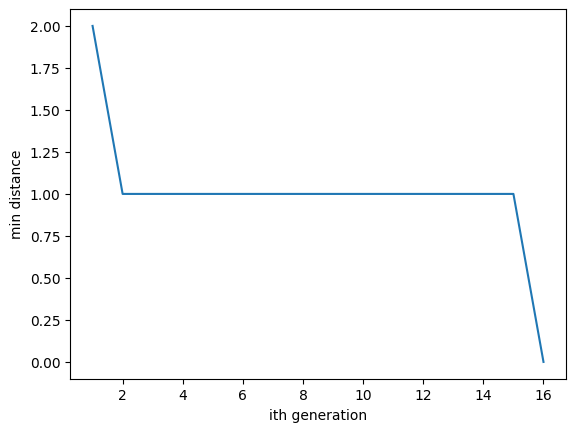

In [10]:
test = AntColony(20, 8,alpha=0.01,beta=50,evap_val=0.15)
min_AntColony(test, stop_point=0)


-- :  20 12 [[2, 2.0902777777777777, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0902777777777777], [2.0902777777777777, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0902777777777777, 2], [2, 2, 2, 2, 2, 2.0902777777777777, 2, 2.0902777777777777, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2.0902777777777777, 2, 2, 2, 2.0902777777777777, 2], [2, 2, 2, 2, 2, 2.0902777777777777, 2, 2, 2, 2.0902777777777777, 2, 2], [2, 2, 2.0902777777777777, 2, 2.0902777777777777, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2.0902777777777777, 2, 2, 2, 2, 2, 2.0902777777777777, 2, 2], [2, 2, 2.0902777777777777, 2, 2, 2, 2, 2, 2.0902777777777777, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2.0902777777777777, 2, 2, 2, 2.0902777777777777], [2, 2, 2, 2, 2.0902777777777777, 2, 2.0902777777777777, 2, 2, 2, 2, 2], [2, 2.0902777777777777, 2, 2.0902777777777777, 2, 2, 2, 2, 2, 2, 2, 2], [2.0902777777777777, 2, 2, 2, 2, 2, 2, 2, 2.0902777777777777, 2, 2, 2]] [8, 8, 11, 16, 4, 8, 6, 9, 5, 6, 8, 5, 5, 7, 14, 11, 11, 8, 5, 13]
The minimum conflicts in 1th gen is: 3 and or best ans i

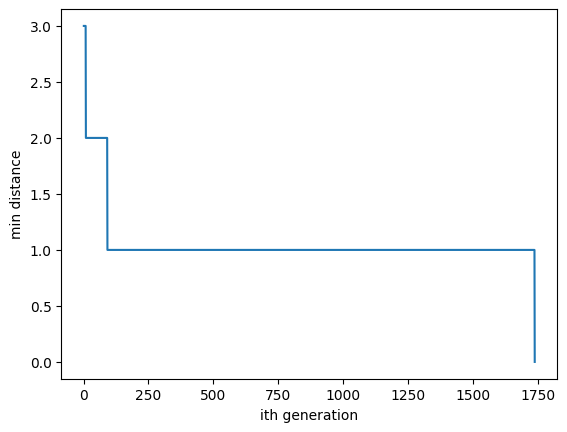

In [11]:
test2 = AntColony(20, 12,alpha=0.001,evap_val=0.001)
min_AntColony(test2, stop_point=0 , stop_gen = 100000)


-- :  20 20 [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2.0225], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2.0225, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2.0225], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2.0225, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2.0225, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2.0225, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2], [2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2.0225, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2.0225, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2], [2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2.0225, 2, 2, 2, 2, 2, 2, 2, 

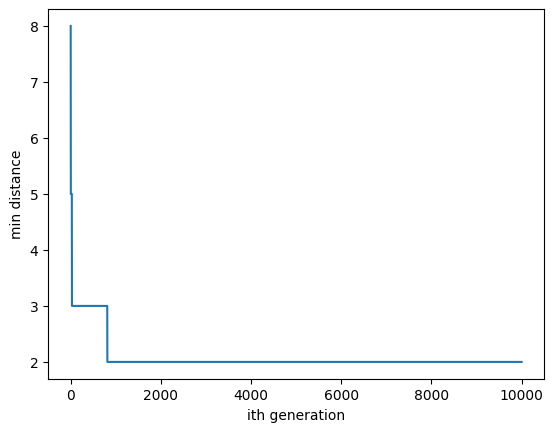

In [13]:
test3 = AntColony(20, 20,alpha=0.1,evap_val=0.00001)
min_AntColony(test3, stop_point=0 , stop_gen = 10000)


-- :  20 30 [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2.0155555555555558, 2, 2], [2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2], [2, 2, 2.0155555555555558, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2], [2, 2, 2, 2.0155555555555558, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0155555555555558, 2, 2, 2

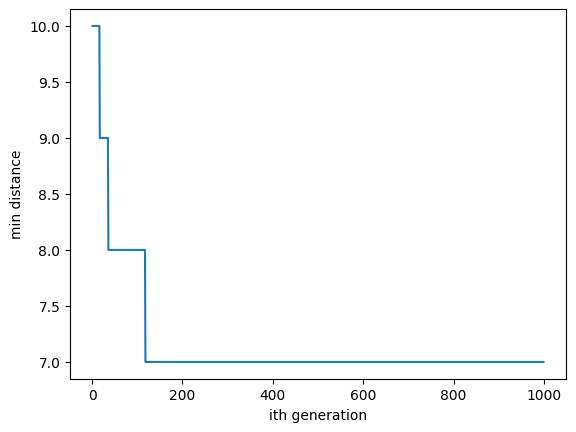

In [15]:
test4 = AntColony(20, 30,alpha=0.0001,evap_val=0.001)
min_AntColony(test4, stop_point=0 , stop_gen = 10000)


-- :  20 40 [[2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0125, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

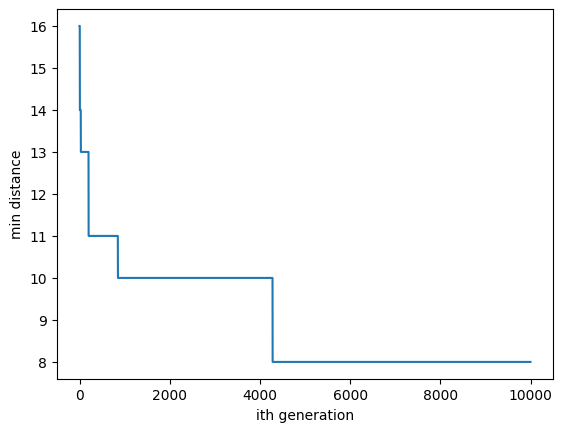

In [16]:
test5 = AntColony(20, 40,alpha=0.0001,evap_val=0.001)
min_AntColony(test5, stop_point=0 , stop_gen = 10000)


-- :  20 50 [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2.0152, 2, 2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0152, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0152, 2, 2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0152, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2,

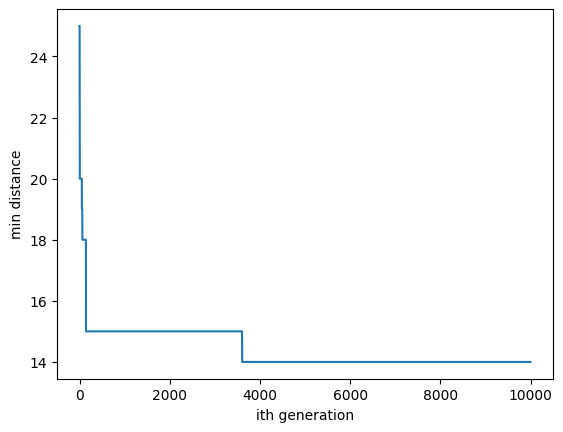

In [17]:
test6 = AntColony(20, 50,alpha=0.0001,evap_val=0.001)
min_AntColony(test6, stop_point=0 , stop_gen = 10000)
